Existe correlação entre a transmissão do COVID-19 e a densidade demográfica da população à nível municipal e estadual no Brasil?

R. Sim, dependendo da quantidade de pessoas, a contaminação é maior devido ao maior número de pessoas que um infectado pode entrar em contato, principalmente em locais de maior aglomeração (Transporte público: ônibus e metrô). (Eloiza)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
corona_municipio =  pd.read_csv('data\\covid19_municipios.csv')
corona_municipio.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-04-03,AC,Acrelândia,city,9,0.0,True,15256.0,1200013.0,58.99318,NaN
1,2020-04-03,AC,Porto Acre,city,1,0.0,True,18504.0,1200807.0,5.40424,NaN
2,2020-04-03,AC,Rio Branco,city,36,0.0,True,407319.0,1200401.0,8.83828,NaN
3,2020-04-03,AC,NaN,state,46,0.0,True,881935.0,12.0,5.21580,NaN
4,2020-04-03,AL,Importados/Indefinidos,city,4,0.0,True,NaN,NaN,NaN,NaN


In [3]:
df = pd.DataFrame()
g_population = corona_municipio.groupby('city')
df['City'] = g_population['estimated_population_2019'].median().index
df['Population'] = g_population['estimated_population_2019'].median().values
df['Confirmed'] = g_population['confirmed'].sum().values
df['Deaths'] = g_population['deaths'].sum().values
df['Confirmed/100k Inhabitants'] = g_population['confirmed_per_100k_inhabitants'].median().values
df.head()

,City,Population,Confirmed,Deaths,Confirmed/100k Inhabitants
0,Abaetetuba,157698.0,4,0.0,0.634120
1,Acrelândia,15256.0,40,0.0,49.160985
2,Adamantina,35068.0,1,0.0,2.851600
3,Afonso Cláudio,30586.0,3,0.0,3.269470
4,Agudos,37214.0,2,0.0,2.687160


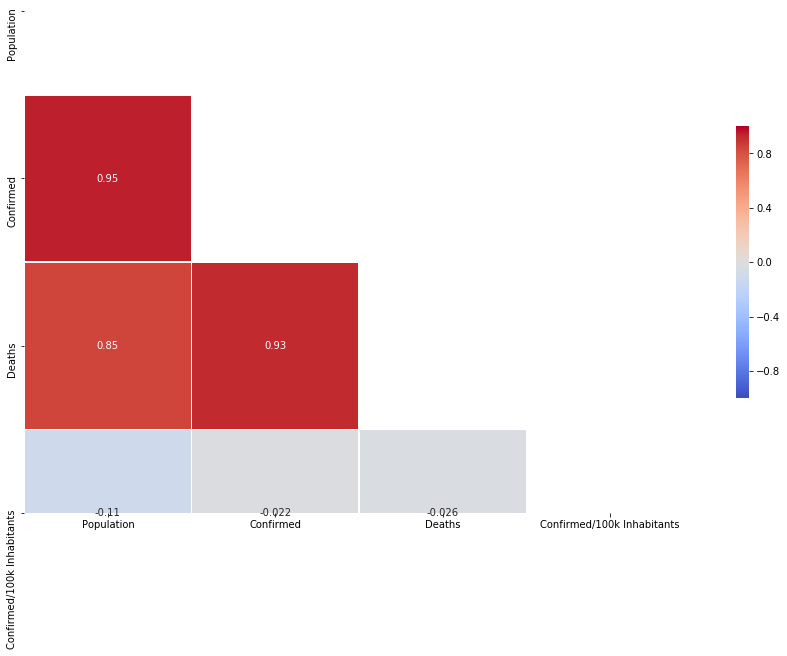

In [4]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True
)
plt.savefig('data\\results\\Heatmap_all_2020-04-05.png', dpi=150)

<Figure size 1080x720 with 0 Axes>

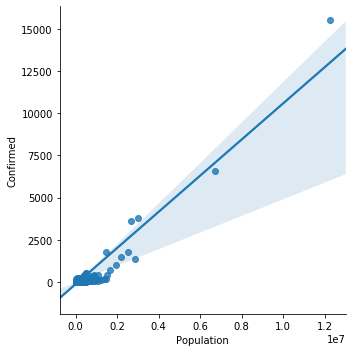

In [5]:
plt.figure(figsize=(15, 10))
sns.lmplot(
    x='Population',
    y='Confirmed',
    data=df
)
plt.savefig('data\\results\\Correlation_all_2020-04-05.png', dpi=150)

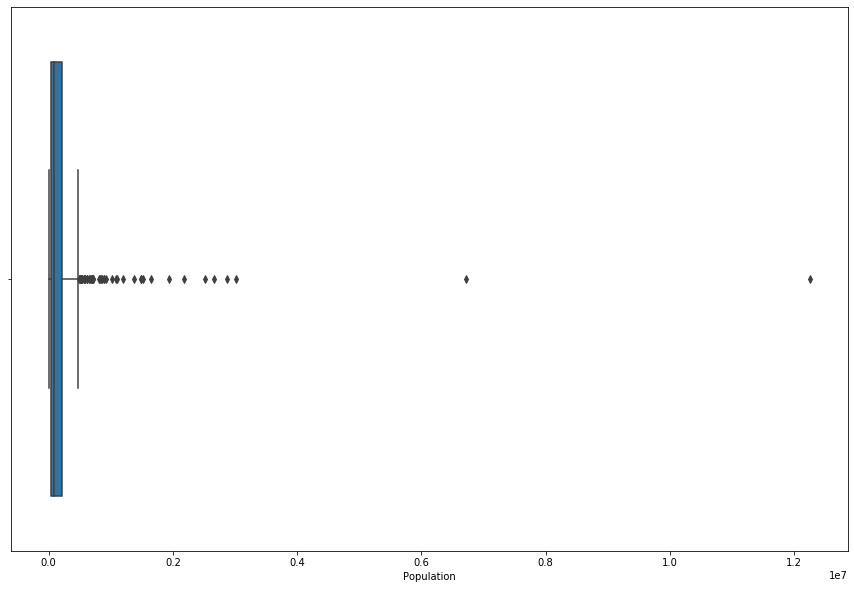

In [6]:
plt.figure(figsize=(15, 10))
sns.boxplot(
    x='Population',
    data=df
)
plt.savefig('data\\results\\Box_Population_2020-04-05.png', dpi=150)

In [7]:
df_mod = df[df['Population'] < 6000000]

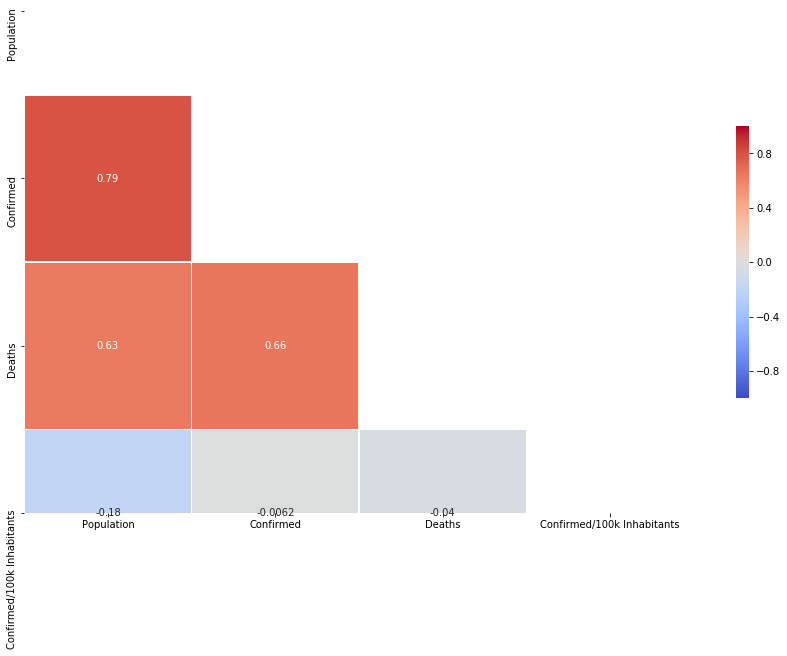

In [8]:
corr = df_mod.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True
)
plt.savefig('data\\results\\Heatmap_2020-04-05.png', dpi=150)

<Figure size 1080x720 with 0 Axes>

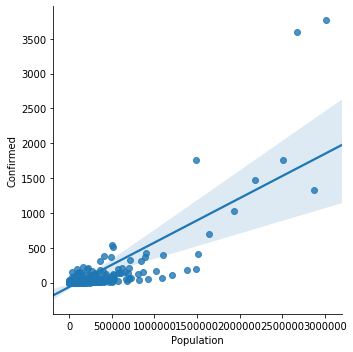

In [9]:
plt.figure(figsize=(15, 10))
sns.lmplot(
    x='Population',
    y='Confirmed',
    data=df_mod,
)
plt.savefig('data\\results\\Correlation_2020-04-05.png', dpi=150)

In [10]:
df[df['Population'] > 6000000]

,City,Population,Confirmed,Deaths,Confirmed/100k Inhabitants
413,Rio de Janeiro,6718903.0,6563,161.0,4.10781
483,São Paulo,12252023.0,15514,892.0,0.35912
